<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#介绍" data-toc-modified-id="介绍-1">介绍</a></span></li><li><span><a href="#知识点" data-toc-modified-id="知识点-2">知识点</a></span></li><li><span><a href="#数据准备" data-toc-modified-id="数据准备-3">数据准备</a></span></li><li><span><a href="#神经网络的全连接" data-toc-modified-id="神经网络的全连接-4">神经网络的全连接</a></span></li><li><span><a href="#神经网络的激活函数" data-toc-modified-id="神经网络的激活函数-5">神经网络的激活函数</a></span><ul class="toc-item"><li><span><a href="#激活函数概述" data-toc-modified-id="激活函数概述-5.1">激活函数概述</a></span></li><li><span><a href="#非线性激活函数的优点" data-toc-modified-id="非线性激活函数的优点-5.2">非线性激活函数的优点</a></span></li><li><span><a href="#激活函数的实现" data-toc-modified-id="激活函数的实现-5.3">激活函数的实现</a></span></li></ul></li><li><span><a href="#神经网络的损失函数" data-toc-modified-id="神经网络的损失函数-6">神经网络的损失函数</a></span><ul class="toc-item"><li><span><a href="#损失函数" data-toc-modified-id="损失函数-6.1">损失函数</a></span></li><li><span><a href="#二次损失函数" data-toc-modified-id="二次损失函数-6.2">二次损失函数</a></span></li><li><span><a href="#独热编码" data-toc-modified-id="独热编码-6.3">独热编码</a></span></li></ul></li><li><span><a href="#准确率函数" data-toc-modified-id="准确率函数-7">准确率函数</a></span></li><li><span><a href="#神经网络正向传播" data-toc-modified-id="神经网络正向传播-8">神经网络正向传播</a></span></li><li><span><a href="#梯度下降算法" data-toc-modified-id="梯度下降算法-9">梯度下降算法</a></span><ul class="toc-item"><li><span><a href="#公式推导" data-toc-modified-id="公式推导-9.1">公式推导</a></span></li><li><span><a href="#步长的设置" data-toc-modified-id="步长的设置-9.2">步长的设置</a></span></li></ul></li><li><span><a href="#反向传播" data-toc-modified-id="反向传播-10">反向传播</a></span><ul class="toc-item"><li><span><a href="#损失函数层的反向传播" data-toc-modified-id="损失函数层的反向传播-10.1">损失函数层的反向传播</a></span></li><li><span><a href="#激活函数的反向传播" data-toc-modified-id="激活函数的反向传播-10.2">激活函数的反向传播</a></span></li><li><span><a href="#全连接层的反向传播" data-toc-modified-id="全连接层的反向传播-10.3">全连接层的反向传播</a></span></li></ul></li><li><span><a href="#手写数字识别" data-toc-modified-id="手写数字识别-11">手写数字识别</a></span></li><li><span><a href="#实验总结" data-toc-modified-id="实验总结-12">实验总结</a></span></li></ul></div>

## 介绍

神经网络中最核心的两个部分便是正向传播和反向传播。本实验将从神经网络的基础结构说起，分别对正向传播和反向传播进行阐述。然后，利用 NumPy 对其进行实现，完成一个完整的神经网络结构。最后，我们使用该神经网络，实现对数字图像进行识别。

## 知识点

- 全连接
- 激活函数
- 独热编码
- 损失函数
- 梯度下降
- 反向传播

*****

## 数据准备

本次实战我们将手写神经网络并对 scikit-learn 中的手写字符数据集 DIGITS 进行识别。

在学习神经网络之前，我们先来查看一下需要使用到的数据集。该数据集包含由 1797 张数字 0 到 9 的手写字符影像转换后的数字矩阵，目标值是 0-9。为了方便，这里直接使用 scikit-learn 提供的 `load_digits` 方法加载该数据集。

In [1]:
from sklearn import datasets

digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

加载完成的 DIGITS 数据集中包含 3 个属性：

|  属性  |                  描述                  |
|:------:|:--------------------------------------:|
| `images` | 8x8 矩阵，记录每张手写字符图像对应的像素灰度值 |
|  `data`  | 将 images 对应的 8x8 矩阵转换为行向量 |
| `target` |     记录 1797 张影像各自代表的数字     |

我们可以根据灰度值矩阵，使用 Matplotlib 把字符对应的灰度图像和标签显示出来看看：

标签为: 0


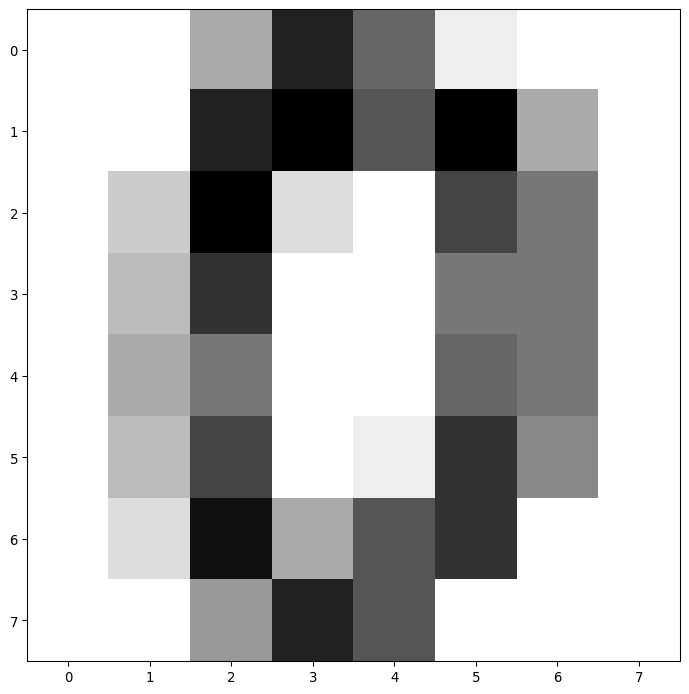

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 9
plt.rcParams['figure.dpi'] = 96

image1 = digits.images[0]
print("标签为:", digits.target[0])
plt.imshow(image1, cmap=plt.cm.gray_r)

从图中可以看到，我们需要识别的图片是 $8 \times 8$ 的灰度图，它们的标签和图片内容一一对应。接下来，我们将在学习神经网络基本结构的同时，利用 Python 手写神经网络并完成对上述数据集的识别。

## 神经网络的全连接

其实神经网络的来源有多种说法，有些人喜欢将生物大脑的神经元网络结构看做是神经网络的灵感来源。大脑神经元的结构如下:

<img width='400px' src="./img/img01.svg">
<div style="color: #888; font-size: 10px; text-align: right;"><a href="https://en.wikipedia.org/wiki/Neuron#/media/File:Neuron_Hand-tuned.svg/"><i class="fa fa-copyright" aria-hidden="true"> 来源</i></a></div>


我们主要关注细胞体、树突、轴突等结构。树突作为接收端，接收从其他神经元传导过来的神经冲动。而轴突将经过细胞体处理的神经冲动传递给其他神经元。从上图可以看出，一个神经元的树突可以有多个，但轴突却只有一个。其实这里的树突就可以看成一个神经元的输入，而轴突其实就是输出。

人工神经网络的结构如下：

<img width='400px'  src="./img/img02.svg">

你会发现这张图片和上面的大脑神经元的图片有很多相似之处，只不过神经冲动在这里变成了具体的数值。

图中的圆圈代表一个个神经元（ Neuron ），其中网络层 1（输入层） 中的每个神经元都与网络层 2 中的每个神经元相连。可以说 $a_1$，$a_2$，$a_3$ 就是一条数据的属性值（输入层的个数和数据的特征个数相同）。$h_1$，$h_2$ 可以看作为第二层网络层的输出。

同时我们注意到，神经元间的连接线上有权重 $w$ 。神经网络工作时，将前一层神经元的输出与权重 $w$ 相乘再加上一个偏移量 $b$ 得到的结果，传递给下一层神经元。即有：

$$\mathrm { w }_{11} \mathrm { a_l } + \mathrm { w }_{12}  \mathrm { a } _{2 }+ \mathrm { w }_{ 13 }\mathrm { a } _{3 }+ \mathrm { b } _{1 }= \mathrm { b } _{1}  \tag 1 $$

$$\mathrm { w }_{21} \mathrm { a_l } + \mathrm { w }_{22}  \mathrm { a } _{2 }+ \mathrm { w }_{ 23 }\mathrm { a } _{3 }+ \mathrm { b } _{2 }= \mathrm { b } _{2} \tag 2$$

写成矩阵的形式：

$$\left[ \begin{array} { l l l } { w _ { 11 } } & { w _ { 12 } } & { w _ { 13 } } \\ { w _ { 21 } } & { w _ { 22 } } & { w _ { 23 } } \end{array} \right] \cdot \left[ \begin{array} { c } { a _ { 1 } } \\ { a _ { 2 } } \\ { a _ { 3 } } \end{array} \right] + \left[ \begin{array} { c } { b_ { 1 } } \\ { b _ { 2 } } \end{array} \right] = \left[ \begin{array} { l } { y _ { 1 } } \\ { y _ { 2 } } \end{array} \right] \tag 3$$

全连接的含义其实就是每层神经元都和下一层的所有神经元相连。

本质上讲，神经网络就是随便给定一组 $w$ 和 $b$，再判断在该 $w$，$b$ 条件下模型的好坏，再通过一定的算法对 $w$ 和 $b$ 进行更新。如此循环，直到求出最佳的 $w$ 矩阵和 $b$ 矩阵的值。求取这些参数的过程其实就是模型的训练（学习）过程。

我们把数据在网络层中从左到右计算的过程称之为「正向传播」，下面使用 Python 将全连接的正向传播过程进行实现。

In [3]:
import numpy as np


class FullyConnect:
    def __init__(self, len_x, len_y):
        """
        Parameters
        ----------
        len_x: int
            输入层特征长度
        len_y: int
            输出层特征长度
        """
        # 权重矩阵（除法意义不明）
        self.weights = np.random.randn(len_y, len_x) / np.sqrt(len_x)
        # 偏置矩阵
        self.bias = np.random.randn(len_y, 1)
        # 学习率
        self.lr = 0
        pass

    def forward(self, x):
        """
        正向传播
        
        Parameters
        ----------
        x: numpy.ndarray
            输入数据集
        
        Returns
        -------
        y: np.ndarray
            本层向前传递后的数据集
        """
        # 缓存中间结果，方便反向传播
        self.x = x
        # 全连接层的本质是矩阵乘法与矩阵加法
        self.y = np.array(
            [np.dot(self.weights, image) + self.bias for image in x])
        return self.y

In [4]:
### 数据集规模 ###
digits.data.shape

(1797, 64)

In [5]:
### 正向传播预测 ###
fully_connected = FullyConnect(64, 1)
# 此处使用5张图片进行预测
fully_result = fully_connected.forward(digits.data[:5])
fully_result

array([[[ 5.87828604]],

       [[ 8.03561769]],

       [[ 3.9451159 ]],

       [[16.00785046]],

       [[-1.7918995 ]]])

## 神经网络的激活函数

### 激活函数概述

上面所说的全连接层的公式其实就是多元一次的乘法，也就是我们常说的线性运算。而神经元的功能远远不止这些，下面我们单独将一个神经元给提出来，看看里面的结构：

<img width='400px' src="./img/img03.svg">

从上图可以看到，神经元除了上面所说的线性转换之外，其实还包含了一个非线性转换:

$$h = g(z) \tag 4$$

而这个非线性转换函数 $g(z)$ 就叫做激活函数。

### 非线性激活函数的优点

有多种理由要求我们必须向神经网络中引入非线性运算。在多层神经网络中，如果没有非线性运算部分，则多个线性运算可以被一个线性运算替换，那么多层次的网络结构就会失去意义（由于矩阵乘法的结合性）。

矩阵乘法的结合性： $b_1 = a_1 \cdot k_1 \cdot k_2$ 与 $b_1=a_1\cdot (k_1\cdot k_2)$ 等价。假设 $k_1 = 3,k_2 = 2$，则 $a_1$ 可以通过先乘以 $2$ ，再乘以$3$，这两次线性变换得到 $b_1$。$a_1$ 也可以通过直接乘以 $6$ ，这一次线性变换得到 $b_1$。

当然还有个比较重要的原因就是非线性的分类效果会比线性的好。为了更好的展示，我们以二维数据为例。假设数据有两个特征 $a_1$，$a_2$ 。且他们最后被分为了两类。如下图所示：

<img width='600px' src="./img/img04.svg">

其中红色和绿色是实际的两种类别，而蓝色的线则是最终训练好的分类模型。由图可以看出，针对于该数据集，线性分类器无法准确的进行分类。 而非线性部分的引入，在一定程度上可以使原本的直线变成曲线，进而得到更好的分类效果，这就是激活函数引入的原因。

### 激活函数的实现

实际运用当中，有多种激活函数可以选择，你甚至可以自己定义一个属于自己的激活函数。这里我们介绍最经典的一种激活函数：Sigmoid 激活函数。它的数学形式为：

$$h = g ( z ) = \frac { 1 } { 1 + e ^ { - z } } \tag 5$$

将全连接输出的数据 $z$ ，放入激活函数中，最终得到该神经元的输出。现在我们利用 Python 自己定义一个 Sigmoid 函数，并且完成他的正向传播过程。最后将的图像画出来看看。

In [6]:
class Sigmoid:
    """ Sigmoid 激活函数 """
    def __init__(self):
        # 无参数，不需要初始化
        pass

    def sigmoid(self, x):
        # 函数定义
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        # 前向传播
        self.x = x
        self.y = self.sigmoid(x)
        return self.y

0.5


Text(0, 0.5, '$\\sigma(z)$')

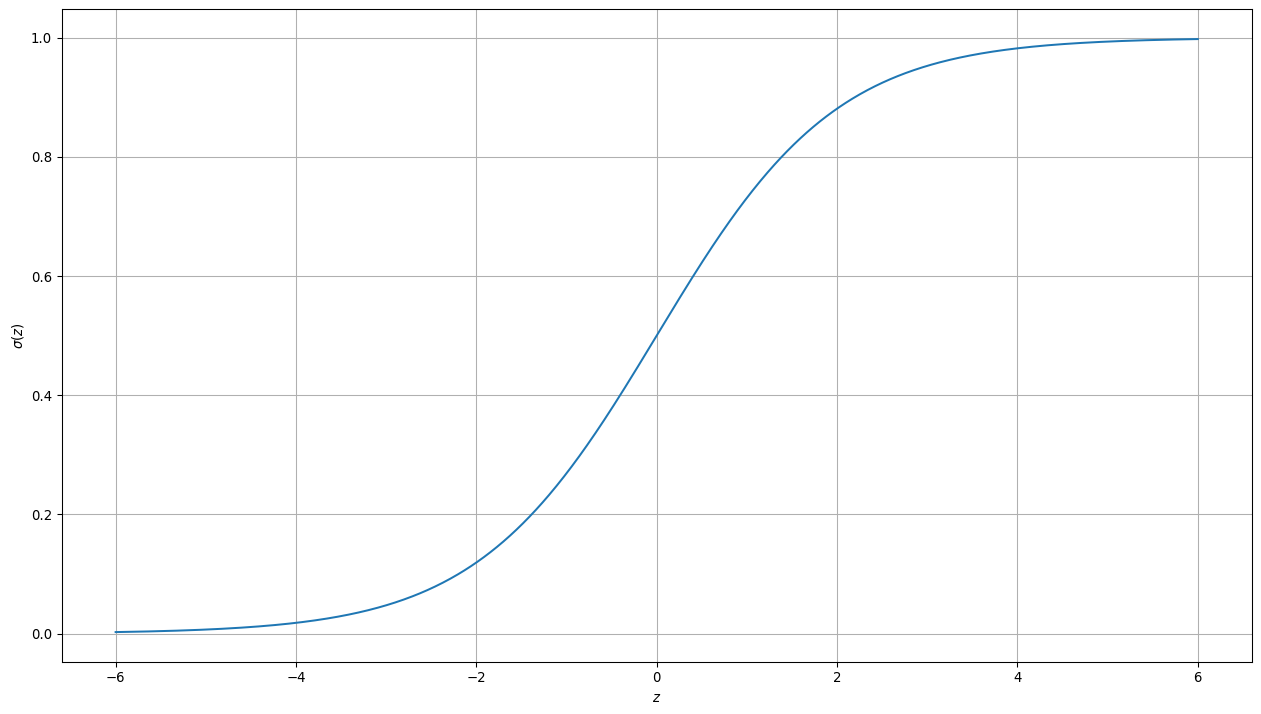

In [7]:
sigmoid = Sigmoid()
print(sigmoid.sigmoid(0))
z = np.linspace(-6, 6, 1000)
plt.plot(z, sigmoid.sigmoid(z))
plt.grid(True)
plt.xlabel('$z$')
plt.ylabel('$\sigma(z)$')

## 神经网络的损失函数

上面我们讲了神经网络的全连接，以及激活函数的正向传播过程。很多神经网络其实就是让数据不断的通过全连接层和激活函数层，最终得到预测结果。那么问题来了，得到预测结果后，如何说明当前状态下的模型是优还是劣呢？神经网络是否还需要继续训练下去呢？为此，我们引入了损失函数的概念。

### 损失函数

损失函数，顾名思义，就是模型预测出来的标签与真实标签的差异。而定义这种差异的函数，就被称为损失函数。深度学习的训练过程其实就是求解损失函数最小值的过程。比如计算真实值和预测值之间的绝对误差，当得到的值比较大时，就说明该神经网络的输出与预期的正确输出偏差较大。反之，如果得到的值很小甚至等于 0 ，就说明我们的模型工作的不错，能够正确的预测输出值。

实际上，现在已经有很多种损失函数供我们选择，这里我们就来介绍一种最经典的损失函数：二次损失函数（Quadratic Loss Function）。

### 二次损失函数

就像它的名字所暗示的那样，Quadratic Loss Function 通过计算 Predict 和 Real 之间差值的平方来衡量神经网络的优劣。具体形式如下：

$$J ( \Theta ) = \frac { 1 } { 2 m } \sum _ { i = 1 } ^ { m } \left( h \left( \Theta , X _ { i } \right) - Y _ { i } \right) ^ { 2 } \tag 6 $$

其中的希腊字母 $\Theta$ 表示模型的参数，也就是上面的 $W$ 和 $bias$ 。$X_i$ 表示第 $i$ 个样本数据，$Y_i$ 代表输入 $X_i$ 所对应的，正确的输出值。$h ( \Theta , X_i )$ 表示将 $X_i$ 输入神经网络，然后通过正向传播后得到的预测值。

函数的意义：求每条数据的损失，然后加起来再取平均得到整个训练数据集的平均损失过程。当然至于这里为什么最后需要除以一个 $2$，容我们放到后面来讲。不过这里除以 $2$ ，对整个神经网络是没有影响的。因为当 $1/2$ 损失函数最小时，损失函数自然也会最小。

为什么损失函数是关于 $\Theta$ 的函数？因为模型的训练集 $X$ 是给定的，而真正的变量其实是 $\Theta$ (也就是每一层的 $W$ 和 $bias$ )，当确定好这些参数后，整个神经网络就训练成功了。

### 独热编码

生活中标签 $Y_i$ 的形式各种各样，有可能是预测天气的阴天，晴天，雨天等标签，也可能是预测字母的 $a,b,c...z$ 等。而如何将这些标签转换成计算机能够识别的标签呢？有很多种方式，比如十进制。但是如果使用十进制来表示这些离散标签的话，会有一个缺点。假设我把 $0$ 当做晴天，$1$ 当做雨天，$2$ 当做阴天。那么在计算损失时，（晴天，阴天）的损失和（晴天，雨天）的损失会不同。可他们都是把标签预测错了，没有理由让他们的损失不同。因此便提出了独热编码的概念。

独热编码：数字的每一位只有 0 和 1 的取值，且每一个都代表一个标签，如果这位取1，其他位则必须为0。如下图所示：

<img width='300px' src="./img/img05.jpg">

当第 0 位为 1 ，其他位为 0 的时候，则表示晴天。当第 1 位为 1，其他位为 0 的时候，则表示雨天，其他的标签同理。这里把他们看做向量坐标，则晴天与阴天的距离和晴天与雪天的距离都为 1。这样计算出来的损失也就相等了。

In [8]:
class QuadraticLoss:
    def __init__(self):
        pass

    def forward(self, x, label):
        """
        前向传播
        
        Parameters
        ----------
        x: numpy.ndarray
            数据集
        label: numpy.ndarray
            真实标签
        
        Returns
        -------
        y: numpy.float
            损失值
        """
        self.x = x
        # 独热编码
        self.label = np.zeros_like(x)
        for a, b in zip(self.label, label):
            a[b] = 1
        self.loss = np.sum(np.square(x - self.label)) / self.x.shape[0] / 2
        return self.loss

In [9]:
# %% 测试
loss = QuadraticLoss()
### "1000" 代表晴天 ###
pred = np.zeros((1, 4))
pred[0][0] = 1
### 执行预测 ###
print("实际为阴天和预测值为晴天的平均损失是：", loss.forward(pred, [1]))
print("实际为雪天和预测值为晴天的平均损失是：", loss.forward(pred, [2]))

实际为阴天和预测值为晴天的平均损失是： 1.0
实际为雪天和预测值为晴天的平均损失是： 1.0


## 准确率函数

之前我们提到了损失函数是用来衡量神经网络是否训练的一个标准，不同的损失函数可能计算出来的损失值的量级可能不同。那么我又该如何来衡量不同的神经网络结构的优劣呢？最简单的方法就是看这个神经网络模型他到底预测正确多少数据，预测错误多少数据，这就是准确率，公式如下：

 $$ \eta = \frac{{N(\text{correct})}}{{N(\text{sum})}} \tag{7}$$

In [10]:
class Accuracy:
    def __init__(self):
        pass

    def forward(self, x, label):
        # 统计正确数量
        self.accuracy = np.sum(
            [np.argmax(image) == tag for image, tag in zip(x, label)])
        # 转换为概率
        self.accuracy = 1 * self.accuracy / x.shape[0]
        return self.accuracy

## 神经网络正向传播

我们已经写好了所有网络层的正向传播，接下来我们要使用这些网络层构建出一个完整的神经网络的正向传播。并传入需要预测的数据集，进行一次正向传播，查看输出结果。

In [11]:
### 加载数据 ###
x = digits.data

### 构建模型 ###
layers = [FullyConnect(8 * 8, 10), Sigmoid()]
loss_layer = QuadraticLoss()
accuracy_layer = Accuracy()

### 正向传播 ###
for layer in layers:
    x = layer.forward(x)
    pass

loss = loss_layer.forward(x, digits.target)
accuracy = accuracy_layer.forward(x, digits.target)
print(f'损失值：{loss:.4f}，准确率：{accuracy:.4f}')

损失值：25.6475，准确率：0.0000


## 梯度下降算法

我们已经学习完了整个神经网络的正向传播过程。正如上文所述，神经网络的学习过程其实就是求解 $W$，$bias$ 在最佳状态下的值。而最佳状态的衡量标准便是损失函数最小。那么怎样求解损失函数最小情况下的参数值呢？这就需要介绍到一种求解求函数最小值的算法：梯度下降算法。

梯度下降算法是一种求解函数极小值的方法，他的中心思想其实很简单，如下图所示，假设你身处峨眉山之中，现在你想以最快的速度下山，那么你应该朝着哪个方向走呢？毋庸置疑，朝着下方，且最陡的方向（如果是垂直的更好，可以马上跳下去，最快的到达山脚）。当然上面只是个比喻，一切还是安全第一。这里我们所说的最陡的方向，用数学的语言表达便是梯度的相反方向（因为梯度表示函数上升最快的方向）。梯度本身是一个向量，由函数对每个自变量分别求偏导得到。

<img src="./img/img06.gif">

### 公式推导

现在我们有了下山的方向，那么假设我们现在所在位置为点 $\Theta$ 。当我朝着梯度相反的方向走了一步后，就到达新的一个点，然后再在这个点上求梯度，再朝着新的梯度相反的方向往下走，这样就能很快的到达山脚，这就是梯度下降的原理。通过公式来表达，就是：

$$\Theta = \Theta - \alpha \frac { d J } { d \Theta } \tag 8$$

注意，这里多了一个希腊字母 $\alpha$, 因为梯度只为我们指明了前进（更新）的方向，而我们具体朝着这个方向「走多远」则由 $\alpha$ 控制。因此 $\alpha$ 还有一个朴素的名字叫做步长（一步走多远的意思），又叫学习率。

### 步长的设置

在深度学习中步长的设计很有讲究。虽然 $\alpha$ 越大，参数 $\Theta$ 更新的幅度就会越大，我们就可能越可能更快的到达最低点。但是 $\alpha$ 不能设置的太大，否则有可能因为步子太大，而直接越过最低点，甚至导致损失函数值不降反升。如下图所示：

<img src="./img/img07.svg">

因此，设置合理的学习速率 $\alpha$ 非常重要。实际当中的做法一般是先设置 $\alpha$ 为一个较小的值，比如 $0.001$ 。观察每一次参数 $\theta$ 更新后损失函数 $J$ 的变化。如果 $J$ 变大了，就将 $\alpha$ 的值除以 $10$，变成 $0.0001$ ，直到损失函数值开始变小。

如果 $J$ 变小了，则可以将 $\alpha$ 再乘以 $10$ ，使得学习的速率更快。最终使 $\alpha$ 停留在一个能够使 $J$ 变小，又不会因为值过小导致学得太慢的「临界值」。

学习率是深度学习过程中的一个『超参数』，它是由我们预先人为指定且不随学习过程自动优化的参数值。模型整体对超参数非常敏感，因此选定一个合理且高效的学习率十分必要。

## 反向传播

下图黑色的箭头展示了，数据正向传导情况，而红色的则反映了反向传播情况。通过正向传播得到的预测值，算出当前 $W$ 和 $b$ 下的损失，然后再通过一层一层的偏导最终得到参数 $W$ 和 $b$ 的变化值 $dw$，$db$ ,然后根据梯度下降的思想，更新参数，再正向传播，如此循环。当损失降到最小或者不变时则停止。

<img src="./img/img08.jpg">

下面我们将按照反向传播的顺序，利用梯度下降的原理，分别对每种类别的网络层进行编写。

### 损失函数层的反向传播

损失函数的公式如下：

$$J ( \Theta ) = \frac { 1 } { 2 m } \sum _ { i = 1 } ^ { m } \left( h \left( \Theta , X _ { i } \right) - Y _ { i } \right) ^ { 2 } \tag 9$$

该公式的具体含义由于上文已有，这里就不做阐述了。这里需要阐述一下的是，为什么得到样本的平均损失之后需要除以 $2$ 。这是为了在求梯度（偏导）时，抵消从指数下来的那一个 $2$ 。

In [12]:
class QuadraticLoss:
    def __init__(self):
        pass

    def forward(self, x, label):
        self.x = x
        # 独热编码
        self.label = np.zeros_like(x)
        for a, b in zip(self.label, label):
            a[b] = 1
        self.loss = np.sum(np.square(x - self.label)) / self.x.shape[0] / 2
        return self.loss

    def backward(self):
        """ 反向传播 """
        self.dx = (self.x - self.label) / self.x.shape[0]
        return self.dx

### 激活函数的反向传播

这里我们选择的激活函数是 Sigmoid 函数，首先需要对这个函数进行求导。Sigmoid 函数的求导过程这里就不阐述了，如果读者有兴趣可以自行推导。Sigmoid 函数的导数如下：

$$sigmoid(x)'=sigmoid(x)*(1-sigmoid(x)) \tag {10}$$

现在我们就可以通过 Sigmoid 函数的导数，对激活函数层的反向传播进行编写。

In [13]:
class Sigmoid:
    def __init__(self):
        pass

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        self.x = x
        self.y = self.sigmoid(x)
        return self.y

    def backward(self, d):
        """ d 代表后一层的偏导数 """
        sig = self.sigmoid(self.x)
        self.dx = d * sig * (1 - sig)
        return self.dx

### 全连接层的反向传播

现在我们已经走到了最后一步，那就是全连接层的反向传播过程。这个过程也是最重要的过程，他将接收激活函数层传递过来的，处理后的损失误差。而这一层也将通过损失误差，计算相应的参数 $w$,$b$ 的梯度 $dw$，$db$ 。而其中参数 $w$，$b$ 与最后的结果产生联系的过程如下所示：

$$\mathrm { z } = \mathrm { w }_{11} * \mathrm { a_l } + \mathrm { w }_{12} * \mathrm { a }_2 + \mathrm { b }_1 \tag{11}$$

$$\mathrm { h } = \operatorname { sigmoid } ( \mathrm { z } )\tag {12}$$

$$\mathrm { h }_1 = \operatorname { sigmoid } \left( \mathrm { w }_{11} * \mathrm { a }_1 + \mathrm { w }_{12} * { \mathrm { a }_{2} } + \mathrm { b }_1 \right)\tag {13}$$

也就是说，我们求的其实是 $h_1$ 关于 $w$ 和 $b$ 的偏导。最终我们可以得到

$$dw = dz \cdot X^T \tag{14}$$

$$db =dz \tag{15}$$

In [14]:
class FullyConnect:
    def __init__(self, l_x, l_y):
        self.weights = np.random.randn(l_y, l_x) / np.sqrt(l_x)
        self.bias = np.random.randn(l_y, 1)
        self.lr = 0

    def forward(self, x):
        self.x = x
        self.y = np.array([np.dot(self.weights, xx) + self.bias for xx in x])
        return self.y

    def backward(self, d):
        ### 链式法则计算偏导数 ###
        ddw = [np.dot(dd, xx.T) for dd, xx in zip(d, self.x)]
        ### 计算所有数据的平均梯度 ###
        self.dw = np.sum(ddw, axis=0) / self.x.shape[0]
        self.db = np.sum(d, axis=0) / self.x.shape[0]
        self.dx = np.array([np.dot(self.weights.T, dd) for dd in d])
        ### 梯度下降法更新权重值
        self.weights -= self.lr * self.dw
        self.bias -= self.lr * self.db
        return self.dx

## 手写数字识别

In [15]:
# 前 1500 条数据用于训练，后续数据用于测试
train_data, train_target = digits.data[:1500], digits.target[:1500]
test_data, test_target = digits.data[1500:-1], digits.target[1500:-1]
train_data.shape, train_target.shape, test_data.shape, test_target.shape

((1500, 64), (1500,), (296, 64), (296,))

In [16]:
# 定义模型结构
inner_layers = [
    FullyConnect(8 * 8, 32 + 16),
    Sigmoid(),
    FullyConnect(32 + 16, 10),
    Sigmoid()
]
inner_layers

In [17]:
loss_layer = QuadraticLoss()
accuracy_layer = Accuracy()
for layer in inner_layers:
    # 对所有模型层设置学习率
    layer.lr = 1000
# 模型准确率将在训练初期快速提升，后续趋于稳定
epochs = 300
loss_layer, accuracy_layer, epochs

(<__main__.QuadraticLoss at 0x1de64bc4910>,
 300)

In [18]:
from tqdm.notebook import tqdm

for i in tqdm(range(epochs)):
    loss_sum = 0
    iters = 0
    x = train_data
    label = train_target
    x = x.reshape(-1, 64, 1)
    ### 前向传播 ###
    for layer in inner_layers:
        x = layer.forward(x)
    loss = loss_layer.forward(x, label)
    loss_sum += loss
    iters += 1
    ### 反向传播 ###
    d = loss_layer.backward()
    for layer in inner_layers[::-1]:
        d = layer.backward(d)

  0%|          | 0/300 [00:00<?, ?it/s]

In [19]:
### 模型评估 ###
x = test_data
label = test_target
x = x.reshape(-10, 64, 1)
for layer in inner_layers:
    x = layer.forward(x)
### 准确率 ###
acc = accuracy_layer.forward(x, label)
print(f'第{i}次迭代，损失值：{loss_sum / iters:.4f}，测试准确率：{acc:.4f}')

第299次迭代，损失值：0.0454，测试准确率：0.9088


我们选用的是 64 → 48 → 10 结构，经过精心调参，我们将准确率提升到了 90% 左右。

## 实验总结

我们从神经网络的原理出发，了解了神经网络的正向传播原理和反向传播原理。并在学习原理的过程中，利用 Python 搭建起了一个简单的神经网络模型。而很多解决实际问题的神经网络其实非常复杂。因此，为了提高效率，我们常常会采用 TensorFlow，PyTorch 等深度学习框架搭建神经网络。 